In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 50)

In [6]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

,Unnamed: 0,age,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,TSH,T3 measured,T3,TT4,T4U,FTI measured,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info
0,0,82.0,f,f,f,f,f,f,f,f,f,2.2,t,1.0,68.0,0.77,t,f,?,SVI,negative.|991,Local-gov,141649,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1935-05-20 00:00:00,"{'TSH measured':'t','sex':'M','query hyperthyr..."
1,1,50.0,f,f,f,t,f,f,f,f,f,76.0,t,0.5,22.0,1.12,t,f,?,other,negative.|1685,Local-gov,177599,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,0,0,35,United-States,67-08-03,"{'TSH measured':'t','sex':'F','query hyperthyr..."
2,2,41.0,f,f,f,f,f,f,f,f,f,NaN,t,2.0,99.0,0.96,t,f,?,other,negative.|3504,Self-emp-not-inc,102631,Some-college,10,Widowed,Farming-fishing,Unmarried,White,0,0,50,United-States,1976-05-02,"{'TSH measured':'f','sex':'F','query hyperthyr..."
3,3,73.0,f,f,f,f,f,f,f,f,f,0.7,t,2.0,116.0,0.99,t,f,?,other,negative.|1942,private,272338,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,0,0,25,United-States,44-10-08,"{'TSH measured':'t','sex':'F','query hyperthyr..."
4,4,64.0,f,f,f,f,f,f,f,f,f,2.0,t,1.8,80.0,0.91,t,f,?,SVHC,negative.|2009,Self-emp-inc,368825,Some-college,10,Married-civ-spouse,Sales,Husband,White,0,0,60,United-States,1953-05-01,"{'TSH measured':'t','sex':'M','query hyperthyr..."


In [7]:
train_data[train_data.duplicated(subset='Unnamed: 0')].size

0

In [8]:
train_data = train_data.set_index('Unnamed: 0')
train_data.columns.names = ['id']
train_data.index.names = ['id']
train_data.head()

id,age,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,TSH,T3 measured,T3,TT4,T4U,FTI measured,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,82.0,f,f,f,f,f,f,f,f,f,2.2,t,1.0,68.0,0.77,t,f,?,SVI,negative.|991,Local-gov,141649,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1935-05-20 00:00:00,"{'TSH measured':'t','sex':'M','query hyperthyr..."
1,50.0,f,f,f,t,f,f,f,f,f,76.0,t,0.5,22.0,1.12,t,f,?,other,negative.|1685,Local-gov,177599,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,0,0,35,United-States,67-08-03,"{'TSH measured':'t','sex':'F','query hyperthyr..."
2,41.0,f,f,f,f,f,f,f,f,f,NaN,t,2.0,99.0,0.96,t,f,?,other,negative.|3504,Self-emp-not-inc,102631,Some-college,10,Widowed,Farming-fishing,Unmarried,White,0,0,50,United-States,1976-05-02,"{'TSH measured':'f','sex':'F','query hyperthyr..."
3,73.0,f,f,f,f,f,f,f,f,f,0.7,t,2.0,116.0,0.99,t,f,?,other,negative.|1942,private,272338,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,0,0,25,United-States,44-10-08,"{'TSH measured':'t','sex':'F','query hyperthyr..."
4,64.0,f,f,f,f,f,f,f,f,f,2.0,t,1.8,80.0,0.91,t,f,?,SVHC,negative.|2009,Self-emp-inc,368825,Some-college,10,Married-civ-spouse,Sales,Husband,White,0,0,60,United-States,1953-05-01,"{'TSH measured':'t','sex':'M','query hyperthyr..."


In [9]:
train_data.shape

(2800, 34)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 0 to 2799
Data columns (total 34 columns):
age                   2519 non-null float64
on thyroxine          2800 non-null object
query on thyroxine    2800 non-null object
pregnant              2800 non-null object
thyroid surgery       2800 non-null object
I131 treatment        2800 non-null object
lithium               2800 non-null object
goitre                2800 non-null object
tumor                 2800 non-null object
hypopituitary         2800 non-null object
TSH                   2516 non-null float64
T3 measured           2800 non-null object
T3                    2215 non-null float64
TT4                   2451 non-null object
T4U                   2503 non-null float64
FTI measured          2800 non-null object
TBG measured          2800 non-null object
TBG                   2800 non-null object
referral source       2800 non-null object
class                 2800 non-null object
workclass             2800 no

In [26]:
train_data.describe(include=['O'])

id,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,T3 measured,TT4,FTI measured,TBG measured,TBG,referral source,class,workclass,education,marital-status,occupation,relationship,race,native-country,date_of_birth,medical_info
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2451,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2799,2800
unique,6,2,2,2,2,2,2,2,2,2,213,2,1,1,5,2800,14,16,7,26,6,5,38,2721,871
top,f,f,f,f,f,f,f,f,f,t,??,t,f,?,other,negative.|3451,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,White,United-States,1961-10-23,"{'TSH measured':'f','sex':'F','query hyperthyr..."
freq,2223,2760,2759,2761,2752,2786,2775,2729,2799,2215,99,2505,2800,2800,1632,1,1774,879,1118,449,899,2318,2493,3,104


In [27]:
train_data['medical_info'][0]

"{'TSH measured':'t','sex':'M','query hyperthyroid':'f','TT4 measured':'t','on antithyroid medication':'f','FTI':'88','sick':'f','T4U measured':'t','psych':'f','query hypothyroid':'f'}"

In [87]:
import json
strr = train_data['medical_info'][0]
strr = strr.replace("'", '"')
data = json.loads(strr)
data['FTI']

'88'

In [21]:
train_data.describe()

id,age,TSH,T3,T4U,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,2519.000000,2516.000000,2215.000000,2503.000000,2.800000e+03,2800.000000,2800.000000,2800.000000,2800.000000
mean,51.793569,4.672150,2.024966,0.997912,1.859808e+05,4.150714,789.960714,75.960357,38.336429
std,20.541137,21.449453,0.824600,0.194390,1.009371e+05,327.452340,5813.819092,374.218100,11.877622
min,1.000000,0.005000,0.050000,0.310000,1.939500e+04,-1600.000000,0.000000,0.000000,1.000000
25%,36.000000,0.440000,1.600000,0.880000,1.185510e+05,9.000000,0.000000,0.000000,35.000000
50%,54.000000,1.400000,2.000000,0.980000,1.772160e+05,10.000000,0.000000,0.000000,40.000000
75%,67.000000,2.600000,2.400000,1.080000,2.276065e+05,13.000000,0.000000,0.000000,40.000000
max,455.000000,478.000000,10.600000,2.120000,1.097453e+06,1500.000000,99999.000000,3683.000000,99.000000


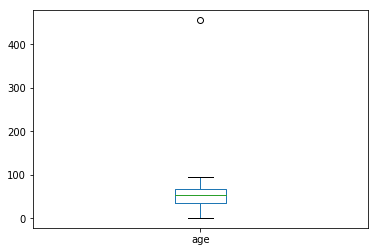

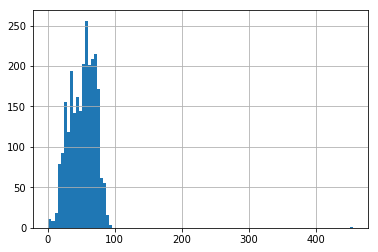

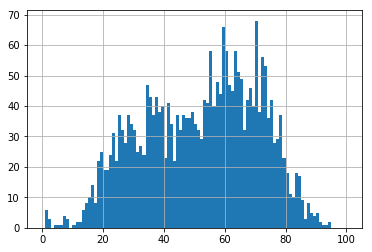

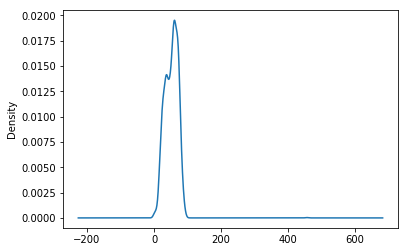

In [65]:
train_data['age'].plot.box()
plt.figure();
train_data['age'].hist(bins=100)
plt.figure();
train_data['age'].hist(bins=100, range=(0,100))
plt.figure();
train_data['age'].plot(kind="density")

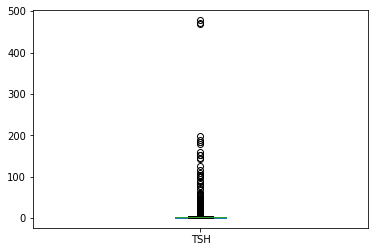

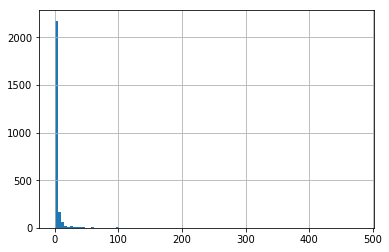

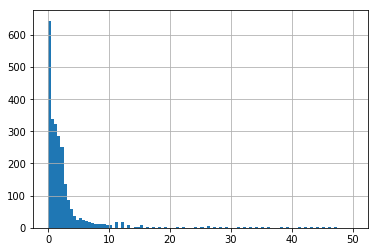

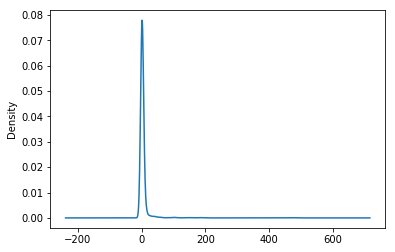

In [66]:
train_data['TSH'].plot.box()
plt.figure();
train_data['TSH'].hist(bins=100)
plt.figure();
train_data['TSH'].hist(bins=100, range=(0, 50.0))
plt.figure();
train_data['TSH'].plot(kind="density")

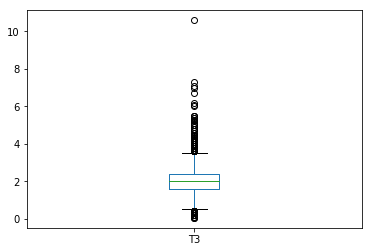

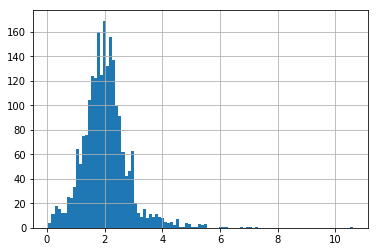

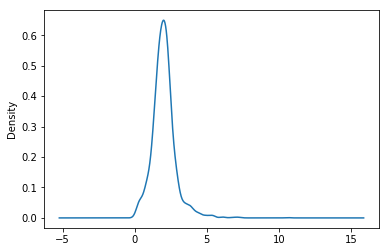

In [67]:
train_data['T3'].plot.box()
plt.figure();
train_data['T3'].hist(bins=100)
plt.figure();
train_data['T3'].plot(kind="density")

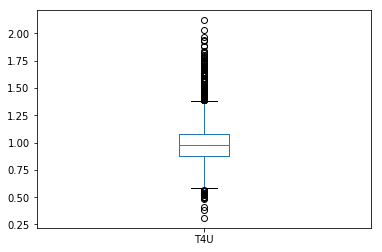

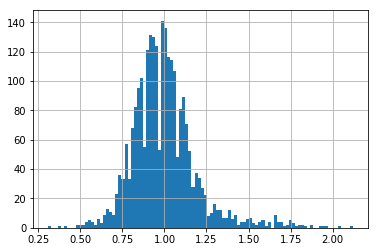

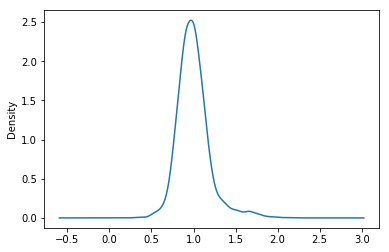

In [68]:
train_data['T4U'].plot.box()
plt.figure();
train_data['T4U'].hist(bins=100)
plt.figure();
train_data['T4U'].plot(kind="density")

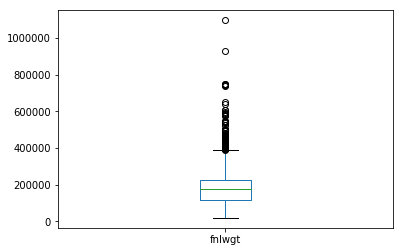

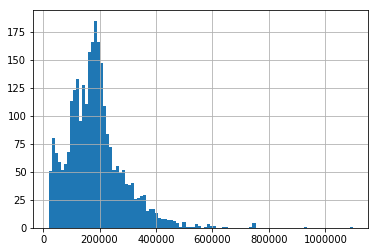

In [95]:
train_data['fnlwgt'].plot.box()
plt.figure();
train_data['fnlwgt'].hist(bins=100)
plt.figure();

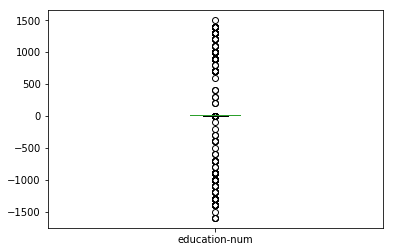

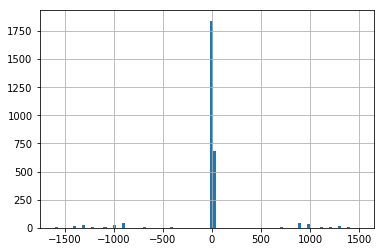

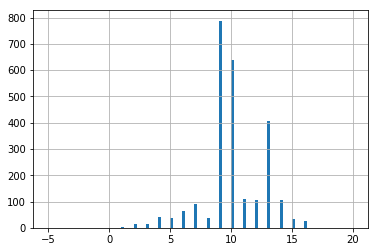

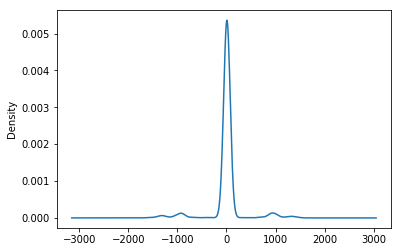

In [64]:
train_data['education-num'].plot.box()
plt.figure();
train_data['education-num'].hist(bins=100)
plt.figure();
train_data['education-num'].hist(bins=100, range=(-5, 20))
plt.figure();
train_data['education-num'].plot(kind="density")

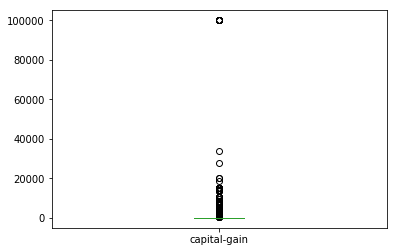

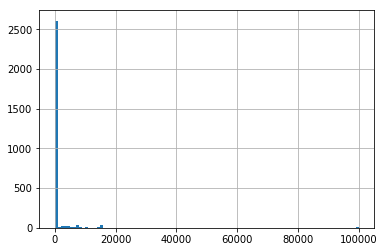

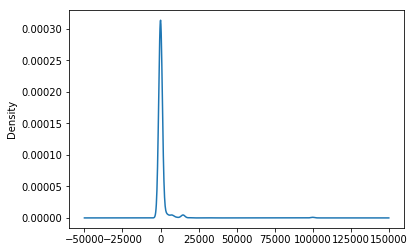

In [63]:
train_data['capital-gain'].plot.box()
plt.figure();
train_data['capital-gain'].hist(bins=100)
plt.figure();
train_data['capital-gain'].plot(kind="density")


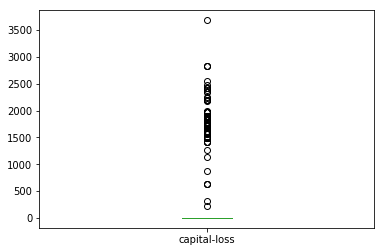

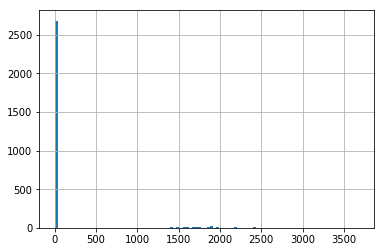

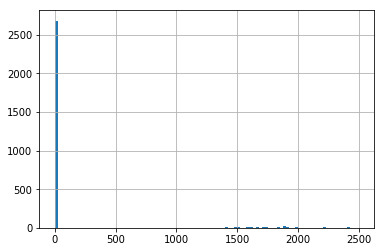

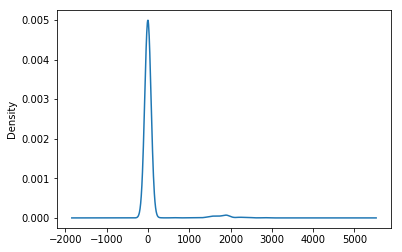

In [62]:
train_data['capital-loss'].plot.box()
plt.figure();
train_data['capital-loss'].hist(bins=100)
plt.figure();
train_data['capital-loss'].plot(kind="density")

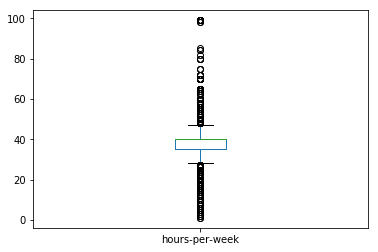

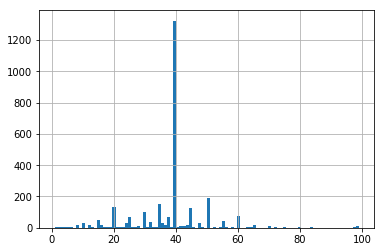

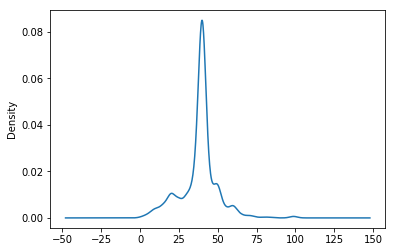

In [61]:
train_data['hours-per-week'].plot.box()
plt.figure();
train_data['hours-per-week'].hist(bins=100)
plt.figure();
train_data['hours-per-week'].plot(kind="density")

In [267]:
for column in train_data.columns[train_data.dtypes == np.object]:
    if train_data[column].unique().size < 50:
        print(column, ':')
        for val in train_data[column].unique():
            print ('   |' + val)
        print()

on thyroxine :
   |f
   |F
   |FALSE
   |t
   |TRUE
   |T

query on thyroxine :
   |f
   |t

pregnant :
   |f
   |t

thyroid surgery :
   |f
   |t

I131 treatment :
   |f
   |t

lithium :
   |f
   |t

goitre :
   |f
   |t

tumor :
   |f
   |t

hypopituitary :
   |f
   |t

T3 measured :
   |t
   |f

FTI measured :
   |t
   |f

TBG measured :
   |f

TBG :
   |?

referral source :
   |SVI
   |other
   |SVHC
   |STMW
   |SVHD

workclass :
   | Local-gov
   | Self-emp-not-inc
   |private
   | Self-emp-inc
   | Private
   | ?
   | State-gov
   |federal-gov
   |local-gov
   | Federal-gov
   |self-emp-not-inc
   |?
   |self-emp-inc
   |state-gov

education :
   | Assoc-voc
   | Bachelors
   | Some-college
   | HS-grad
   | 11th
   | Assoc-acdm
   | 12th
   | 10th
   | Masters
   | 9th
   | 7th-8th
   | Preschool
   | Prof-school
   | 1st-4th
   | Doctorate
   | 5th-6th

marital-status :
   | Married-civ-spouse
   | Divorced
   | Widowed
   | Never-married
   | Separated
   | Married-spouse-abs

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


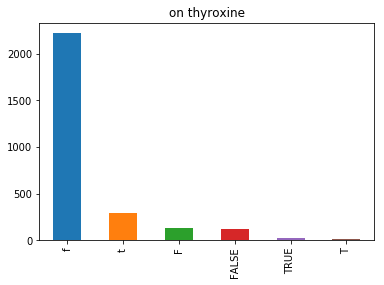

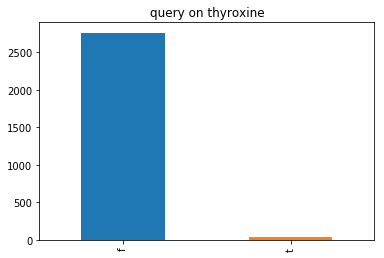

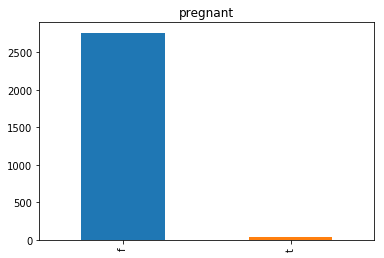

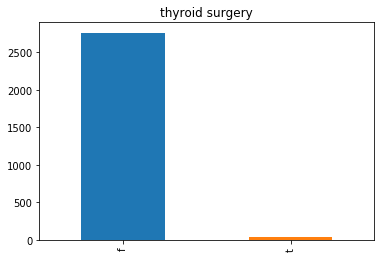

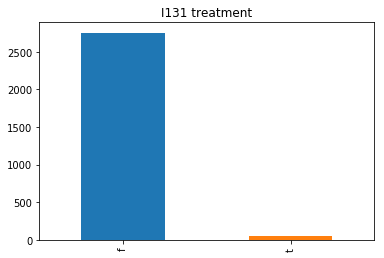

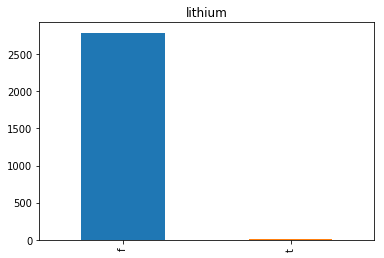

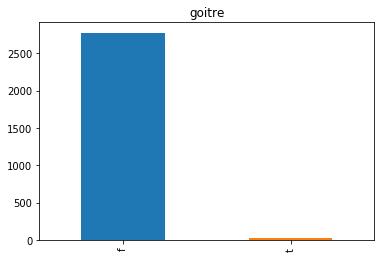

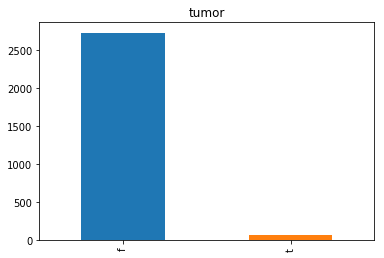

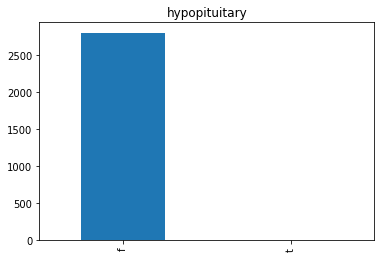

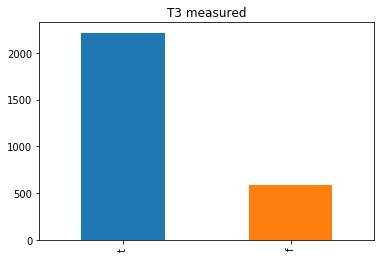

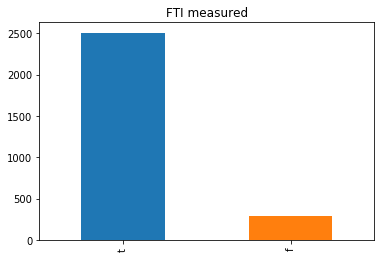

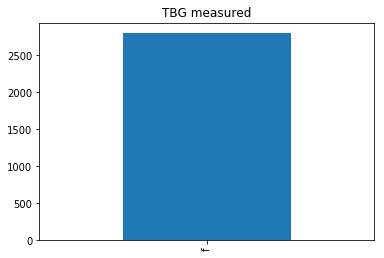

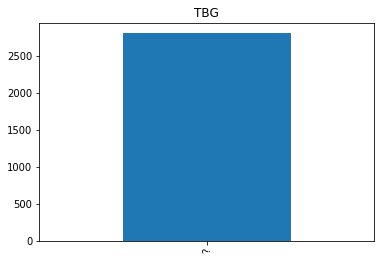

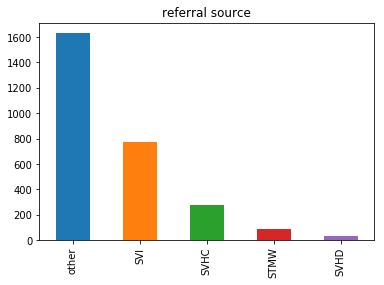

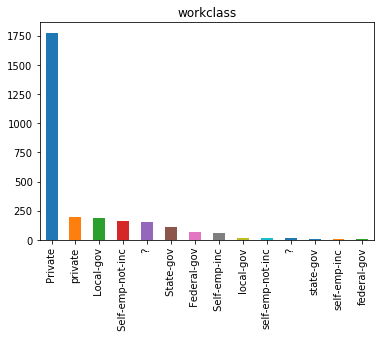

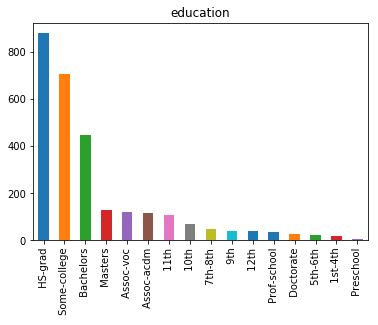

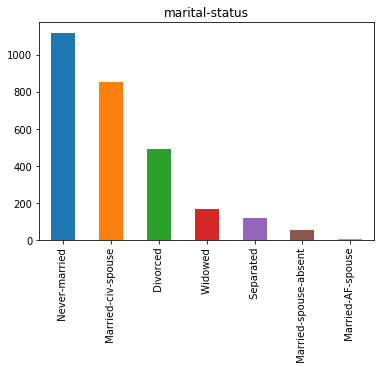

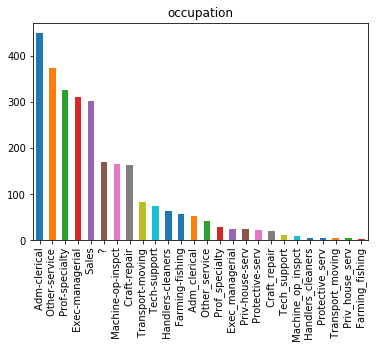

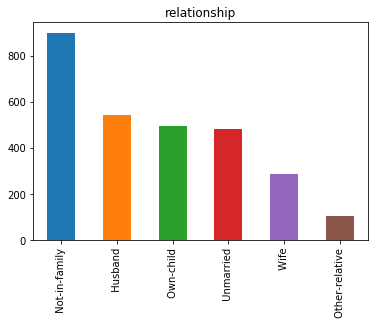

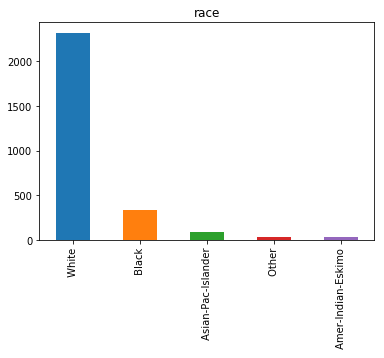

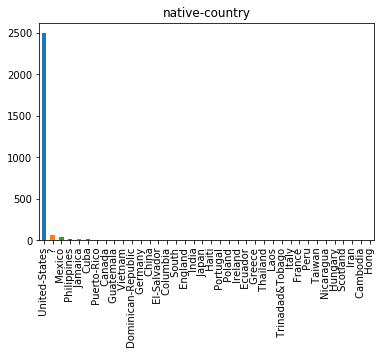

In [84]:
for column in train_data.columns[train_data.dtypes == np.object]:
    if train_data[column].unique().size < 50:
        train_data[column].value_counts().plot(kind='bar', title=column)
        plt.figure()

In [79]:
train_data['native-country'].value_counts()

 United-States         2493
 ?                       60
 Mexico                  47
 Philippines             17
 Jamaica                 12
 Cuba                    12
 Puerto-Rico             11
 Canada                  11
 Guatemala               10
 Vietnam                  8
 Dominican-Republic       8
 Germany                  8
 China                    7
 El-Salvador              7
 Columbia                 7
 South                    7
 England                  6
 India                    6
 Japan                    5
 Haiti                    5
 Portugal                 5
 Poland                   5
 Ireland                  5
 Ecuador                  4
 Greece                   4
 Thailand                 4
 Laos                     3
 Trinadad&Tobago          3
 Italy                    3
 France                   3
 Peru                     3
 Taiwan                   2
 Nicaragua                2
 Hungary                  2
 Scotland                 2
 Iran               

In [86]:
train_data['hypopituitary'].value_counts()

f    2799
t       1
Name: hypopituitary, dtype: int64